## Hyperparameter Optimization

### Difference between model parameters and model hyperparameters

| Model Parameters | Model Hyperparameters |
| --- | --- | 
| Required for **making predictions**  | Required for estimating the model parameters for making prediction |
| Not set manually | Set manually | 
| Final parameters found after training will decide how the model will perform on unseen data | Choice of hyperparamters decide how efficient the training is | 
| Model parameters specify how to transform the input data into desired output | Model hyperparameters define how the model is structured | 

### What is [hyperparameter tuning](https://www.jeremyjordan.me/hyperparameter-tuning/)?
- When creating an machine learning model, you'll be presented with design choices as to how to define the model architecture
- To find the optimal model architecture for a given model, we need to explore a range of possibilities for the hyperparameters
- We learnt that the parameters which define the model architecture are called **hyperparameters**
- `Process of searching for the ideal model architecture is referred to as hyperparameter tuning`
- `Aim of hyperparameter optimization in machine learning is to find the hyperparameters of a given machine learning algorithm that return the best performance as measured on a validation set`
- Hyperparameters might address the model design questions such as:
    - Linear Models
        - Degree of polynomial features to be used for the linear model
    - Decision Tree
        - Maximum depth of a Decision Tree
        - Minimum number of samples required at a leaf node in the 
    - Random Forest
        - Number of estimators (i.e., number of decision trees to be included
        - Maximum allowable depth for each decision tree
    - Gradient Descent
        - Learning rate

### Steps in hyperparamter tuning a model
1. Define a model
2. Define the range of possible values for all hyperparameters
3. Define a method for sampling hyperparamter values (GridSearchCV, RandomizedSearchCV, BayesianSearch)
4. Define an evaluative criteria to judge the model
5. Define a cross-validation method

### Importance
- Hyperparameter tuning/optimization is the process of determining the right combination of hyperparameters that *maximizes the model performance.* 
- Runs multiple trials in a single training process
    - Each trial is a complete execution of training application with values for the chosen hyperparamters set within the limits you specify
- This process once finished will give you the set of hyperparameter values that are best suited for the model to give optimal results

### Finding the best hyperparameters
Finfing the best hyperparameters depends on the algorithm and the business specific use-case. There are two ways to set them:

#### 1. Manual hyperparameter tuning
- Involves experimenting with different sets of hyperparameters manually
    - Each trial is performed by you

##### Advantages
    - More control over the process
    - Useful when doing research or studying on the effects of different hyperparameters

##### Disadvantages
    - Tedious since there can be many trials
    - Difficult to keep track, costly and time consuming
    - Not a practical approach since there are way too many combinations of hyperparameters to consider

#### 2. Automated hyperparameter tuning
- Uses already existing algorithms to automate the process
    - Specify a set of hyperparameters and limits to algorithm specific hyperparameter values
    - The hyperparameters are set as a dictionary or list data structures
    - The algorithm runs the trials and returns the best performing hyperparameters for optimal results `(.best_estimator_)`
    - For automated hyperparameter tuning we run the train-predict-evaluate cycle automatically in a loop

#### Model Validation - Importance of splitting data into train, test and validation sets
- Ultimate goal for any machine learning model is to learn from examples in such a manner that the model is capable of generalizing the learning to new instances which it has not yet seen
- Train on subset of total dataset
- Hold out remaining data for evaluation to gauge the model's ability to generalize
- **What is generalizing?**
    - How well will my model do on data which it hasn't directly learned from during training
- While starting to explore various model architectures (i.e. different hyperparameter values), we need a way to evaluate each model's ability to generalize to unseen data
- **Why not to use testing dataset for this evaluation?**
    - **Data Leakage**
    - If we use the testing data for this evaluation, we'll end up **fitting** the model architecture to the testing dataset
    - Makes us lose the ability to truely evaluate the model performance on *unseen* data
- To mitigate this, we'll end up splitting the total dataset into 3 subsets:
    - Training dataset
    - Testing data
    - Validation data
- **Validation set** allows evaluation of the model on different data than it was trained on and select the best model hyperparameters with optimal performance, while still holding out a subset of data for final evaluation at the end of model development
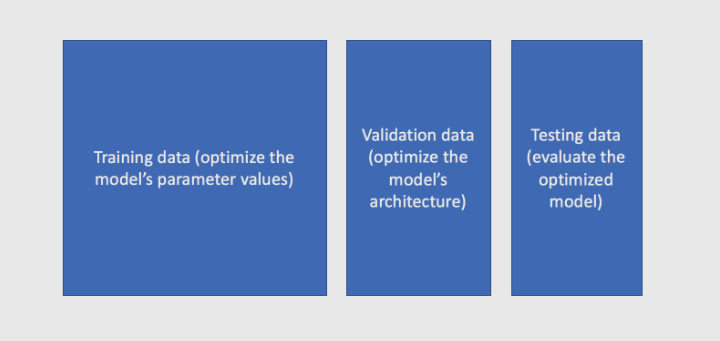
- **K-fold cross validation** is a good technique to combine training and validation data for both learning the model parameters and evaluating the model without introducing data leakage

### Hyperparameter tuning methods w.r.t Random Forest
- Sampling possible model hyperparameter candidates from the space of all possible hyperparameter values

#### 1. Grid Search
- Most basic hyperparameter tuning method
- With this technique we simply **build a model for each possible combination of all of the hyperparameter values provided**
- Evaluate each model
- Select the model architecture with the best hyperparameter values producing the best results
- For e.g.: For the following list of values for the hyperparameters
```
n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
```
We get 4 x 4 = 16 combinations of models. Each model would be fit to the training data and evaluated on the validation data. 
- This technique is `inefficient` and `compuationally intensive`

#### 2. Random Search
- Unlike Grid Search (where we provide a discrete set of values to explore for each hyperparameter), we provide a statistical distribution for each hyperparameter from which the values may be randomly sampled
- We can define the number of iterations `(n_iter)` we'd like to build when searching for the optimal model
- For each iteration, the hyperparameter values of the model will be set by sampling the defined distributions

**NOTE:**
- One of the main reasons to use random search instead of Grid Search is the fact that for most cases, `hyperparameters are not equally important`
- Different hyperparameters are important on different datasets
- And for most datasets only a few hyperparameters matter

**Example:**
- Say, we search over a hyperparameter space where one hyperparameter has significantly more influence on optimizing the model score
- We evaluate 9 models in each case of Grid Search and Randomized Search
- Grid Search
    - Misses the optimal model and spends redundant time exploring the *unimportant hyperparamter*
    - Each hyperparameter was isolated and we searched for the best possible value result while holding all other hyperparameters as constant
    - For all the cases where the hyperparamter being studied has little or no effect on the resulting model score
    - This leads in wasted effort
- Random Search
    - Has much improved exploratory power
    - Focuses on finding the optimal value for the important hyperparameters

**NOTE:**
- Random search works best under the assumption that `not all hyperparameters are equally important`
- This isn't always the case, but the assumption holds true for most datasets

### 3. [Bayesian Optimization](https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f)
- Belongs to a class of **sequential model-based optimization (SMBO)**
- Keeps track of the past evaluation results
    - Used to form a probabilistic model which maps the hyperparameters to a probability of a socre on the cost function
```
P( score | hyperparameters )
``` 